In [23]:
# Imported Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

# Classifier Libraries
from imblearn.over_sampling import SMOTE 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# Other Libraries
import warnings
warnings.filterwarnings("ignore")

# Data Exploration

In [24]:
#Make Sense of Data
path = '/Users/mac/Dropbox/Thinkful_Coursework/Course/Unit_3/Lesson 6/Credit Card Fraud/creditcard.csv'
df = pd.read_csv(path)
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [25]:
#Make Sense of Data
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [26]:
#Average $ Amount of each Transaction
df.Amount.mean()

88.34961925093133

In [27]:
#Check for Null Values
df.isnull().sum().max()

0

In [28]:
#Review all Columns
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [29]:
#Check classes for imbalance
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,5), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,5), '% of the dataset')

No Frauds 99.82725 % of the dataset
Frauds 0.17275 % of the dataset


# Initial Feature Engineering

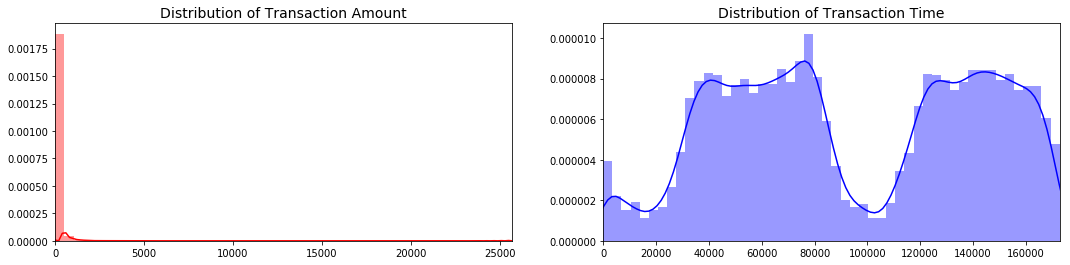

In [10]:
#Check distributions of Amount and Time Features
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

In [11]:
#Scale Amount and Time feautures to align with others.
from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

#Drop Original Amount and Time features
df.drop(['Time','Amount'], axis=1, inplace=True)

df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


In [12]:
#Put scaled_amount and scaled_time in front of dataframe.
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


# Prepare Dataset For Modeling

In [13]:
X = df.drop('Class', axis=1)
y = df['Class']

#Use Oversample to manage unbalanced dataset
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_sample(X, y)

#Create balanced dataframe
balanced_df = pd.DataFrame(X_res)
balanced_df['Class'] = y_res

#Check to see if classes are now balanced
pd.DataFrame(y_res)[0].value_counts()

1    284315
0    284315
Name: 0, dtype: int64

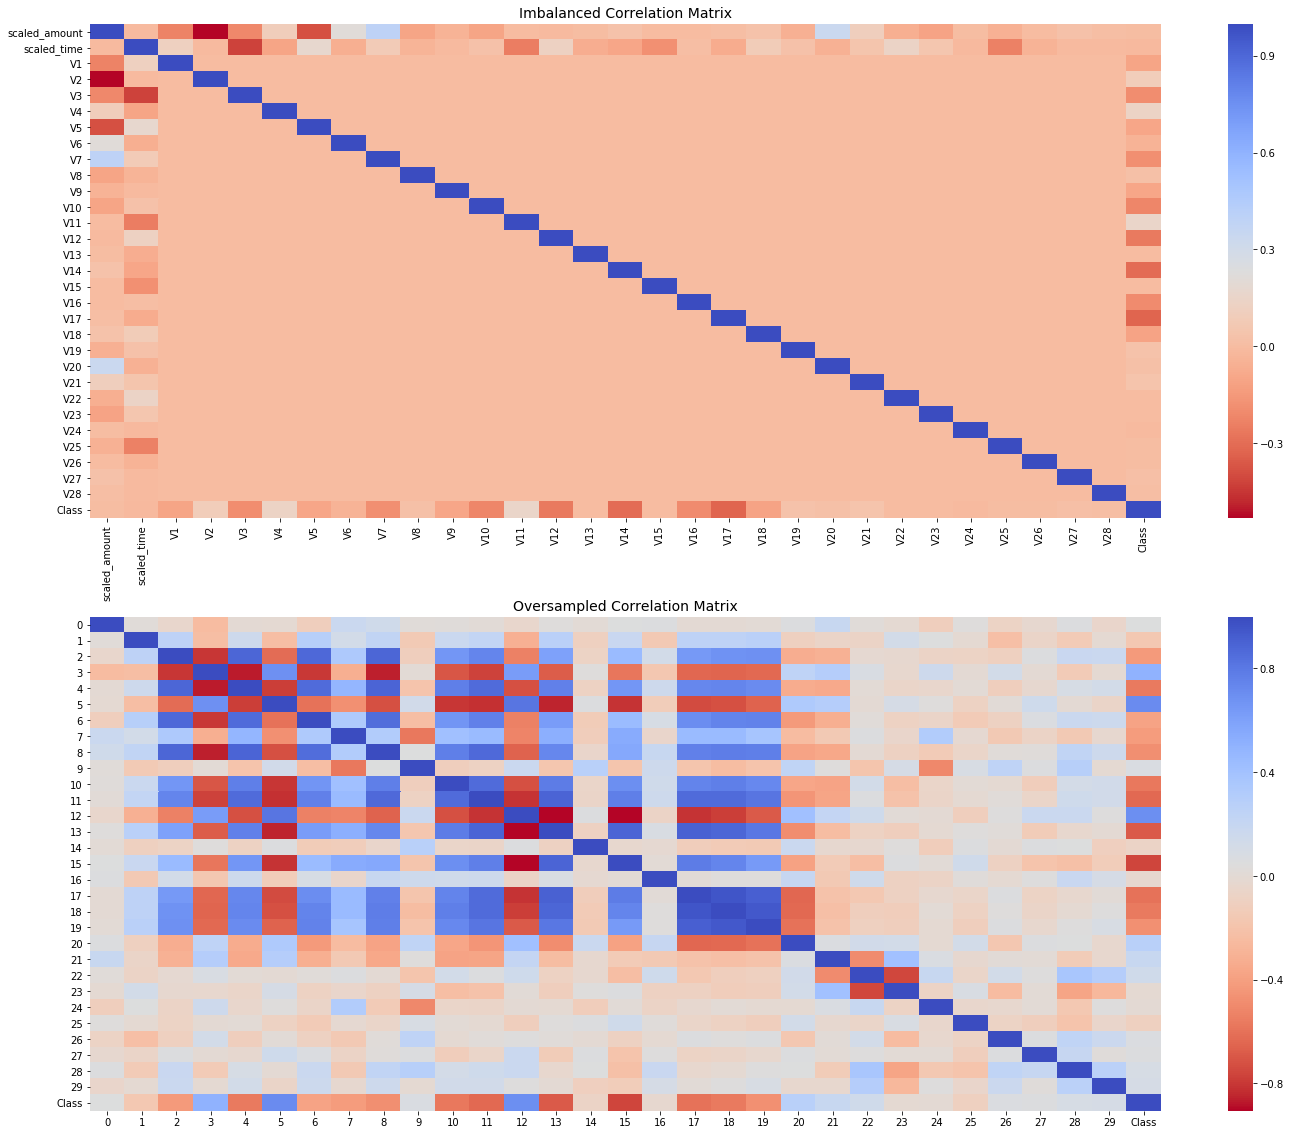

In [14]:
# Review Correlation Matrix
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Original Dataframe
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title('Imbalanced Correlation Matrix', fontsize=14)

# Balanced Dataframe
sub_sample_corr = balanced_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('Oversampled Correlation Matrix', fontsize=14)
plt.show()

# Fit Classifiers

In [15]:
#Split Training and Test Sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [16]:
#Fit Logistic Regression Model
lr = LogisticRegression()
lr.fit(X_train, y_train)

#Determine Logisitic Regression Score
print('Logistic Regression Model Accuarcy is', round(lr.score(X_test, y_test) * 100,2),'%')

#Create Logsitic Regression Confusion Matrix
y_pred = lr.predict(X_test)
confusion_matrix(y_test, y_pred)

Logistic Regression Model Accuarcy is 95.01 %


array([[55401,  1349],
       [ 4330, 52646]])

In [17]:
#Fit Random Forest Classifer
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

#Determine Random Forest Classifer Scoare
print('Random Forest Classifer Model Accuarcy is', round(rf.score(X_test, y_test) * 100,2),'%')

#Create Random Forest Classifer Confusion Matrix
y_pred = rf.predict(X_test)
confusion_matrix(y_test, y_pred)

Random Forest Classifer Model Accuarcy is 99.99 %


array([[56738,    12],
       [    0, 56976]])

In [18]:
#Fit KNeighbors Classifer
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

#Determine Random Forest Classifer Scoare
print('KNeighbors Classifer Model Accuarcy is', round(knn.score(X_test, y_test) * 100,2),'%')

#Create Random Forest Classifer Confusion Matrix
y_pred = knn.predict(X_test)
confusion_matrix(y_test, y_pred)

KNeighbors Classifer Model Accuarcy is 99.88 %


array([[56617,   133],
       [    0, 56976]])

In [19]:
#Fit Support Vector Classifer
svc = SVC()
svc.fit(X_train, y_train)

#Determine Random Forest Classifer Scoare
print('Support Vector Classifer Model Accuarcy is', round(svc.score(X_test, y_test) * 100,2),'%')

#Create Random Forest Classifer Confusion Matrix
y_pred = svc.predict(X_test)
confusion_matrix(y_test, y_pred)

Support Vector Classifer Model Accuarcy is 99.86 %


array([[56596,   154],
       [    7, 56969]])

In [20]:
#Create holdout class on orginal unbalanced dataset
df_0 = df[df.Class == 0].sample(frac=.10)
df_1 = df[df.Class == 1].sample(frac=.10)
df_holdout = pd.concat([df_0, df_1])

#Check to see if dataset is still unbalanced
df_holdout.Class.value_counts()

0    28432
1       49
Name: Class, dtype: int64

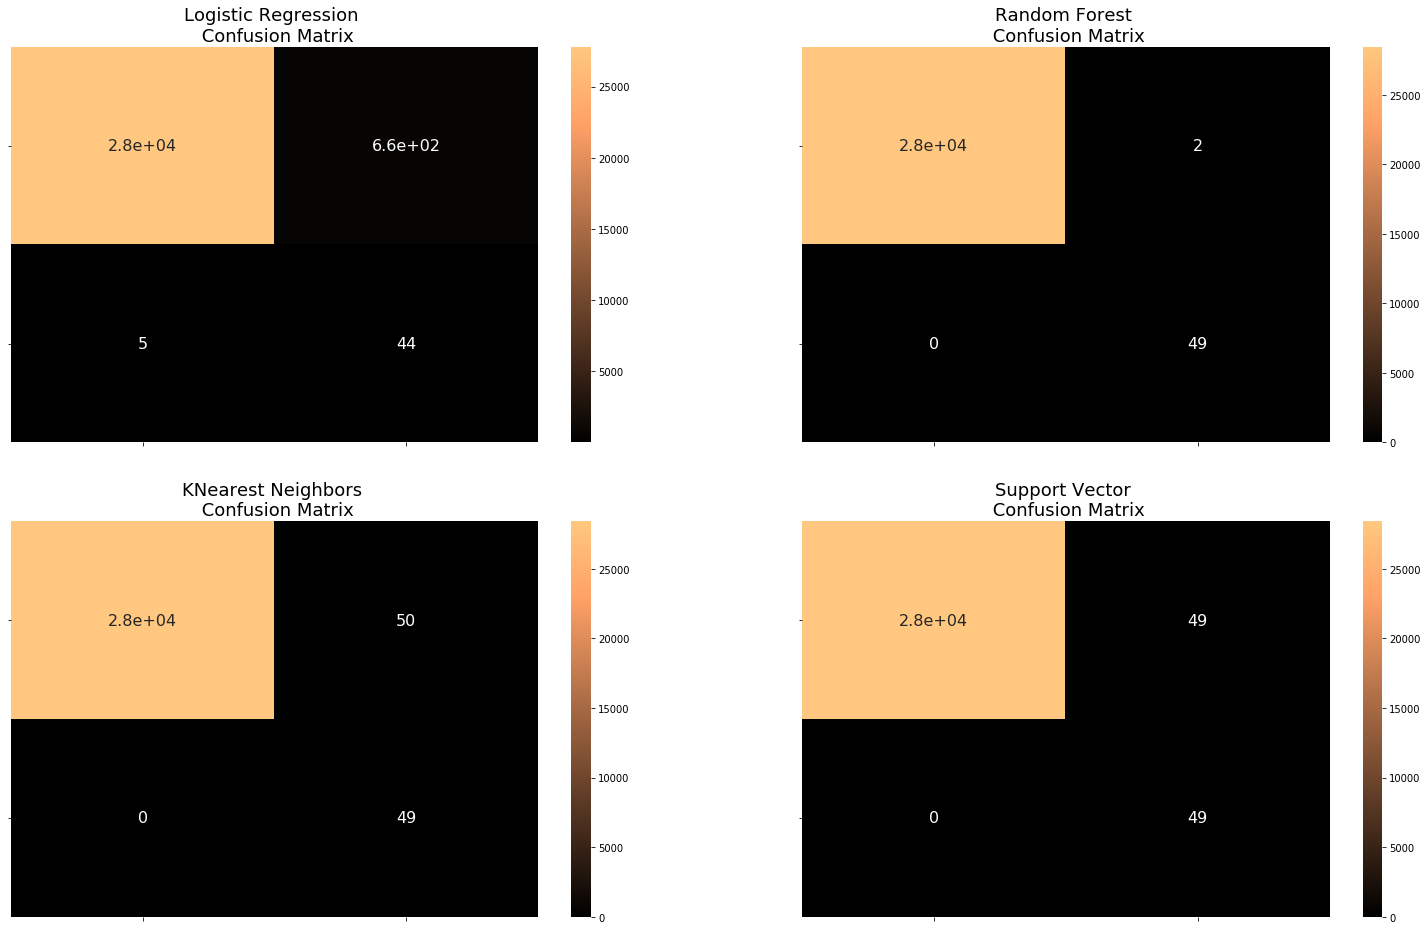

In [21]:
#Run model on holdout group from orginal unbalanced dataset
X_holdout = df_holdout.drop('Class', axis=1)
Y_holdout = df_holdout['Class']

#Get y_pred for all classifers
Y_holdout_pred_lr = lr.predict(X_holdout)
Y_holdout_pred_rf = rf.predict(X_holdout)
Y_holdout_pred_knn = knn.predict(X_holdout)
Y_holdout_pred_svc = svc.predict(X_holdout)

#Get confusion matrix for all classifers
lr_cm = confusion_matrix(Y_holdout, Y_holdout_pred_lr)
rf_cm = confusion_matrix(Y_holdout, Y_holdout_pred_rf)
knn_cm = confusion_matrix(Y_holdout, Y_holdout_pred_knn)
svc_cm = confusion_matrix(Y_holdout, Y_holdout_pred_svc)

#Setup Confusion Matrix Plots
fig, ax = plt.subplots(2, 2,figsize=(26,16))
labels = ['No Fraud', 'Fraud']

#Logisitic Regression Confusion Matrix
sns.heatmap(lr_cm, ax=ax[0][0], annot=True, annot_kws={"size": 16}, cmap=plt.cm.copper)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=18)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

#Random Forest Confusion Matrix
sns.heatmap(rf_cm, ax=ax[0][1], annot=True, annot_kws={"size": 16}, cmap=plt.cm.copper)
ax[0][1].set_title("Random Forest \n Confusion Matrix", fontsize=18)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

#KNearest Neighbors Confusion Matrix
sns.heatmap(knn_cm, ax=ax[1][0], annot=True, annot_kws={"size": 16}, cmap=plt.cm.copper)
ax[1][0].set_title("KNearest Neighbors \n Confusion Matrix", fontsize=18)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

#Support Vector Confusion Matrix
sns.heatmap(svc_cm, ax=ax[1][1], annot=True, annot_kws={"size": 16}, cmap=plt.cm.copper)
ax[1][1].set_title("Support Vector \n Confusion Matrix", fontsize=18)
ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

plt.show()

# Conclusion

The original dataset is highly unbalanced given that fraud occurs only on a very small amount of financial transactions. Oversampling using the SMOTE method was utilized to create a balanced dataframe with equal numbers of both Fraud and No Fraud cases.  This balanced dataframe was used to train and test the classifer models.  Of the four classifers used on the balanced dataframe, the Random Forest Classifer performed the best with accuracy of 99.9% and the lowest number of false positive and negatives.  

Given that the intent of this model is to detect Fraud utilizing the original unbalanced dataset, the holdout method was utilized to evaluate the performance of the model.  Of the four classifers used on the unbalanced dataset, again the Random Forest Classifer performed the best.  It was able to correctly classify all cases.  